# Lab 1: decimation

In [2]:
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import IPython.display as ipd

def decimate(x, k):
    '''Decimate a signal x by a factor of k
    
    Parameters
    ----------
    x : of type np.ndarray
        The input signal in an array
        
    k : int > 0
        The decimation factor
        
    Returns
    -------
    y : of type np.ndarray
        The decimated signal in the form of an array
    ''' 
    y = x[::k] #This will index the input array to what ever k value you choose. Decimation code
    if k < 0:
        raise ValueError("k CAN NOT be negative")  # k can not be negative thus adding an if statement will ensure that you correclty use a postive integer.
    return(y)    

### Some tests to determine if decimate works properly

Run the following cell to check your implementation

In [2]:
import numpy as np

print('Testing length of decimated signals: ', end='')
assert len(decimate(np.arange(12), 1)) == 12
assert len(decimate(np.arange(12), 2)) == 6
assert len(decimate(np.arange(12), 3)) == 4
assert len(decimate(np.arange(12), 4)) == 3
assert len(decimate(np.arange(12), 5)) == 3
assert len(decimate(np.arange(12), 20)) == 1
print('Okay!')

print('Testing values of decimated signals: ', end='')
assert np.allclose(decimate(np.arange(12), 1), np.arange(0, 12, 1))
assert np.allclose(decimate(np.arange(12), 2), np.arange(0, 12, 2))
assert np.allclose(decimate(np.arange(12), 3), np.arange(0, 12, 3))
assert np.allclose(decimate(np.arange(12), 4), np.arange(0, 12, 4))
assert np.allclose(decimate(np.arange(12), 5), np.arange(0, 12, 5))
assert np.allclose(decimate(np.arange(12), 20), [0])
print('Okay!')

Testing length of decimated signals: Okay!
Testing values of decimated signals: Okay!


(0.0, 10.0)

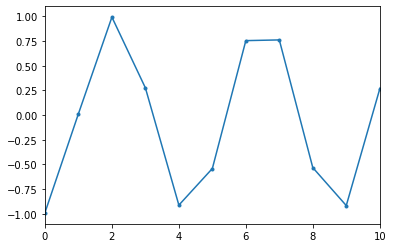

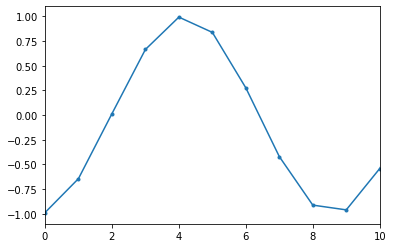

In [9]:
sweep_array,sr = lr.load("lab1-sweep.wav")
y = decimate(sweep_array,2)

plt.figure()
plt.xlim([0,10])
plt.plot(y,'.-')
plt.figure()
plt.plot(sweep_array,'.-')
plt.xlim([0,10])

---
## Use the space below to call the function defined above and test different values of k

In [3]:
sweep_array,sr = lr.load("lab1-sweep.wav")
print('Original Sampling Rate: {} Hz'.format(sr))

k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
    y = decimate(sweep_array,k[i-1])
    sounds = ipd.Audio(y,rate = sr/k[i-1])
    print('k = {}'.format(i))
    print('Sample Rate: {} Hz'.format(sr/k[i-1]))
    display(sounds)
    


Original Sampling Rate: 22050 Hz
k = 1
Sample Rate: 22050.0 Hz


k = 2
Sample Rate: 11025.0 Hz
k = 3
Sample Rate: 7350.0 Hz


k = 4
Sample Rate: 5512.5 Hz


k = 5
Sample Rate: 4410.0 Hz


k = 6
Sample Rate: 3675.0 Hz


k = 7
Sample Rate: 3150.0 Hz


k = 8
Sample Rate: 2756.25 Hz


k = 9
Sample Rate: 2450.0 Hz


k = 10
Sample Rate: 2205.0 Hz


---
## Questions:

1. What's the smallest value of `k` before the signal presents distortion?

2. Explain in terms of the sampling theorem why this distortion happens.

3. What is the original sampling rate of the signal? What is the minimum sampling rate before it presents distortion? (Show your procedure to find the latter).

3. Given what you know about the test signal’s original sampling rate, and the value of k where distortion starts to happen, what can you say about the range of frequency content in the test signal?(Important: Your procedure must be shown to get credits)


## Answers:

1. The smallest value of k before the signal begins to distort is k = 4. At k =5 you hear a full distortion of the signal. 
2. This distortion happens because the sampling theorem states that there is a frequency limit at which one can sample a signal before it starts to alias. 
3. The orignal sampling rate is 22,050 Hz. Using the Nyqusist theorem, $f_s \ge 2\cdot f_+$, the minimum sampling rate before it presents distortion is 11,025 Hz, this is the Nyquist frequency, $f_s/2$. Anything below that you run the risk of distortion. 
4. We know that the original sampling rate is 22,050 Hz and that the lowest k before distortion is 4 which coresponds with a sampling rate of 5,512.5 Hz. Using the asumption that $f_s \ge f_+ - f_- \rightarrow f_+\le f_s+f_-$ is sufficient enough to prevent aliasing, in this case the distortion we hear. The range of frequency content in the test signal then would be 5,512.5 Hz < 22,050 Hz < 30,512.5 Hz.
